# Mount Google Drive 
To YesWeGanData1 to access the required TfRecords through google drive

In [1]:
# Mount to YesWeGanData1@gmail.com
#password:Password: YiannisJake123 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# tf.__version__

#Function.py
To allow for easy to understand, easy to run notebooks, much of the code is hidden in multiple .py folders.

The strcuture of the networks, the paramaters for the optimisers and the path to the folder locations can all be found here.
The code below imports this code from the specified path

These Python files are backed up by my github account. See this link:
https://github.com/PMacBeets/YesWeGan_

In [2]:
# Access Python Modules In Google Drive

# 
import importlib.util
# I did this to download a module of python functions from a path on google collab
# I assume if you just change the path it should operate fine

# Files for reading in Data
spec = importlib.util.spec_from_file_location("ReadFiles","/content/gdrive/My Drive/PythonFiles_git/ReadFiles.py")
ReadFiles = importlib.util.module_from_spec(spec)
spec.loader.exec_module(ReadFiles)
print(ReadFiles.cube(2))
print(ReadFiles)
print(ReadFiles.FILEHASHKEY)


# Files for Generatring Network Models
spec = importlib.util.spec_from_file_location("NetworkModels","/content/gdrive/My Drive/PythonFiles_git/NetworkModels.py")
NetworkModels = importlib.util.module_from_spec(spec)
spec.loader.exec_module(NetworkModels)
print(NetworkModels.square(2))
print(NetworkModels)
print(NetworkModels.FILEHASHKEY)

# Files for Running Model
spec = importlib.util.spec_from_file_location("Training","/content/gdrive/My Drive/PythonFiles_git/Training.py")
Training = importlib.util.module_from_spec(spec)
spec.loader.exec_module(Training)
print(Training.print_hashkey())
print(Training)




8
<module 'ReadFiles' from '/content/gdrive/My Drive/PythonFiles_git/ReadFiles.py'>
123


Using TensorFlow backend.


4
<module 'NetworkModels' from '/content/gdrive/My Drive/PythonFiles_git/NetworkModels.py'>
8
4
None
<module 'Training' from '/content/gdrive/My Drive/PythonFiles_git/Training.py'>


In [0]:
cd /content/gdrive/My\ Drive/PythonFiles_git/

/content/gdrive/My Drive/PythonFiles_git


#Load PreTrained Models

In [17]:
# Load Models
import tensorflow as tf
model_folder = '/content/drive/My Drive/Colab_Notebooks/FashionAssignment/saved_model/ResNet/adam_constant_dropout_50/checkpoint'
Generator = tf.keras.models.load_model("/content/gdrive/My Drive/Gen Models/Gen_ModelA")
Discriminator = tf.keras.models.load_model("/content/gdrive/My Drive/Disc Models/Disc_ModelA")

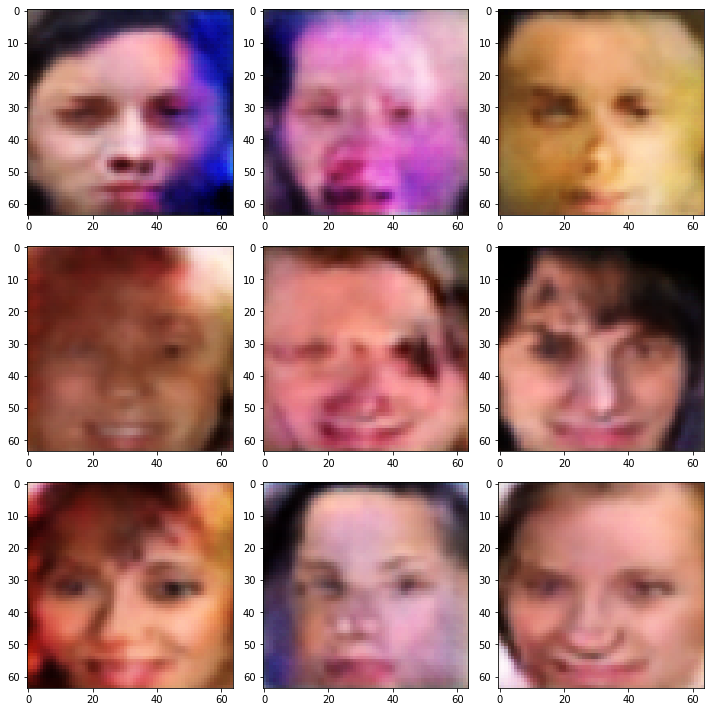

In [19]:
# Test Generator
import matplotlib.pyplot as plt
Num = 10
num_latent = 100
test_seed = tf.random.normal([Num, num_latent])
gen_image = Generator(test_seed , training=False)

plt.figure(figsize=(10, 10))

for ind, im in enumerate(gen_image[:9]):
    im = tf.keras.preprocessing.image.array_to_img(im)
    plt.subplot(3, 3, ind+1)
    plt.imshow(im)
plt.tight_layout()
plt.show()

# Read Tf Records
 - flag = "MNIST" to download MNIST numbers
 - flag = "CelebA" to download celebA data
    - Different folder corresponds to different dataset
    - Each unique folder must automatically have aunique number of files that need to be read...ect
    - Could use the size and channel info to automatically assign generators later

<ShuffleDataset shapes: ((None, None, None), ()), types: (tf.float32, tf.string)>


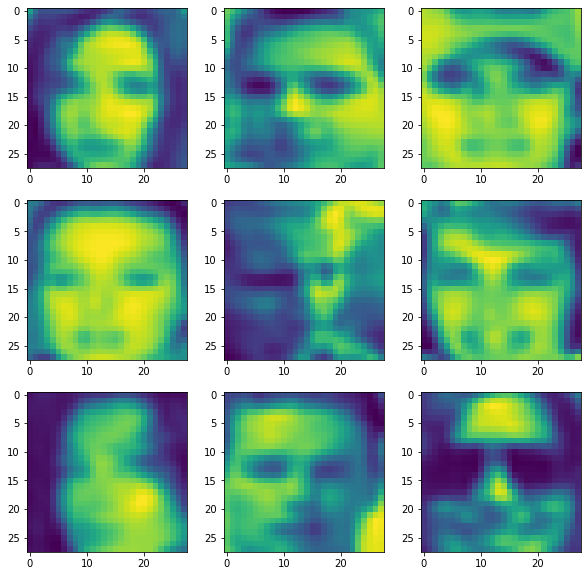

-0.98897815 0.42805254
<BatchDataset shapes: ((None, None, None, None), (None,)), types: (tf.float32, tf.string)>


In [9]:
import matplotlib.pyplot as plt
from keras import backend
from math import gcd
import tensorflow as tf

batch_size = 64

data_flag = "CelebA"      # "CelebA" or "MNIST"

#below paramters only relevant if data_flag="CelebA"
zoom = True   # True or False, image zoomed into face
size = 28   #64 or 28
channels = 1  #3 or 1

dataset = ReadFiles.ReadData(flag=data_flag,zoom=zoom,size=size,channels=channels,plotdata=True,batch_size=batch_size )

print(dataset)

# Generator

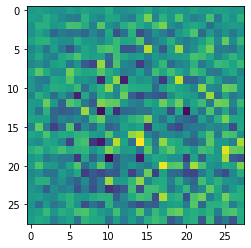

In [10]:
num_latent = 100 # Noise Vector Length Variable

# Generator was left pretty much unchanged for the majority of he experiments
# Other geneterator networks experimented with include:
# - make_generator_model_MNIST_Deep
# - make_generator_model_MNIST_Deep3

generator = NetworkModels.make_generator_model_MNIST()

noise = tf.random.normal([1, num_latent])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])


In [11]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

# Discriminator

In [0]:
from tensorflow.keras import layers
import tensorflow as tf



In [13]:

# The majorirty of networks built

dropout = False
batch_norm = True
activation = 'sigmoid'
ksize=2
Deeper = 2
Double = False



# - NetworkModels.make_discriminator_model_MNIST_Dynamic(dropout,batch_norm,activation)
# - NetworkModels.make_discriminator_model_MNIST_Dynamic_Deeper(dropout,batch_norm,activation,ksize,Deeper,Double)


discriminator = NetworkModels.make_discriminator_model_MNIST_Dynamic(dropout,batch_norm,activation)
#decision = discriminator(generated_image)
#print (decision)
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [0]:
import time
from IPython import display

num_epoch = 8
num_ex_FID = batch_size  #num_examples_to_generate_FID

generator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)

FID_bool = False
label_smoothing = 0
FID_batch_interval = 0.1

loss_func_key = "non_sat" #"binarycrossentropy" "n_s"


# one seed for to create the GIF, another seed to generate more images fir FID evaluation
num_ex_GIF = 16    # num_examples_to_generate_GIF

# We will reuse this seed overtime to visualize progress in animated GIF
seed_GIF = tf.random.normal([num_ex_GIF, num_latent])
seed_FID = tf.random.normal([num_ex_FID, num_latent])




In [0]:
# Paramters to be passed into the train function

var = {
    "epochs":num_epoch,
    "num_latent":num_latent,
    "batch_size":batch_size, 
    "label_smoothing":label_smoothing,  
}

instr ={
    "FID":FID_bool,
    "dataflag": data_flag,
    'FID_batch_interval':FID_batch_interval,
}

seeds = {
    "seed_GIF":seed_GIF,
    "seed_FID": seed_FID,
    "num_ex_GIF":num_ex_GIF,    #numer of samples for the GIF
    "num_ex_FID":num_ex_FID     #number of samples to calculate the FID
}

model = {
    "generator":generator,
    "discriminator":discriminator,
    "loss_func":loss_func_key,
    "generator_optimizer": generator_optimizer,
    "discriminator_optimizer": discriminator_optimizer  
}


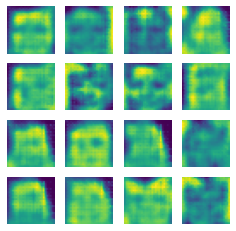

Time for epoch 8 is 37.189393520355225 sec

Time to save gif is 1.5207240581512451 sec



In [0]:
#train(training_data.dataset, num_epoch,seed)
# imbed ns into generic method
OUT = Training.train2(dataset,var=var,instr=instr,seeds=seeds,model=model)


In [0]:


generator.save("/content/gdrive/My Drive/Gen_Model3")
discriminator.save("/content/gdrive/My Drive/Disc_Model3")
# Rename them manually

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Gen_Model4/assets
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Disc_Model4/assets


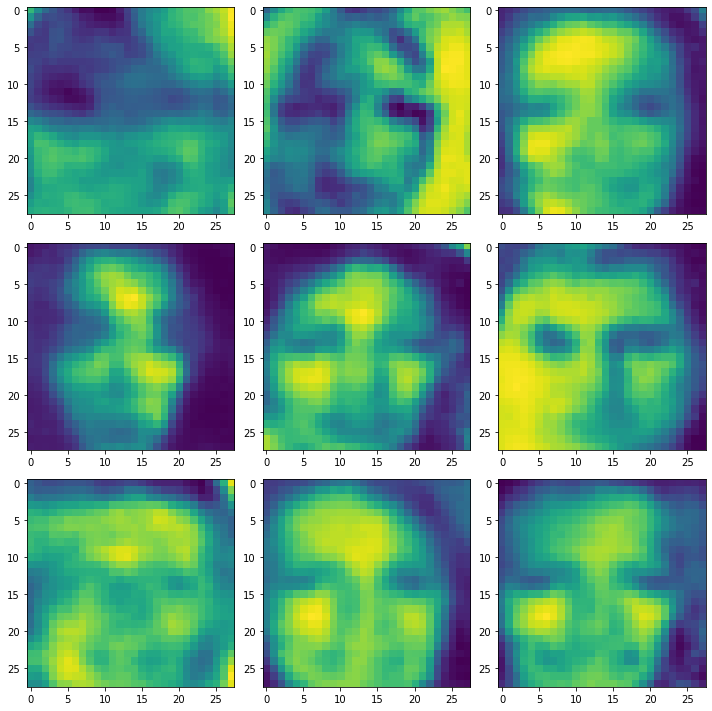

In [0]:
test_seed = tf.random.normal([num_ex_GIF, num_latent])
gen_image = generator(test_seed , training=False)

plt.figure(figsize=(10, 10))

for ind, im in enumerate(gen_image[:9]):
    im = tf.keras.preprocessing.image.array_to_img(im)
    plt.subplot(3, 3, ind+1)
    plt.imshow(im)
plt.tight_layout()
plt.show()

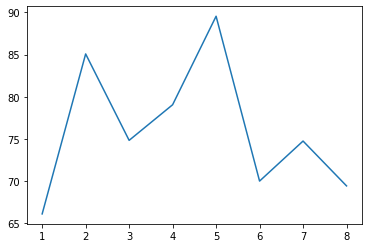

In [0]:
import numpy as np
FID = OUT[0]
epoch_by_batch = np.arange(1,num_epoch+1,1)
plt.plot(epoch_by_batch,FID, label='FID Distance')


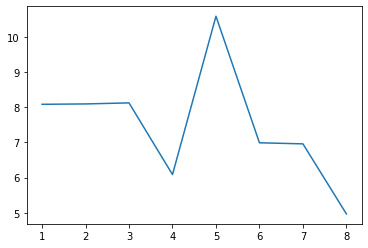

In [0]:
FID_MC = OUT[2]
epoch_by_batch = np.arange(1,num_epoch+1,1)
plt.plot(epoch_by_batch,FID_MC, label='FID Distance')


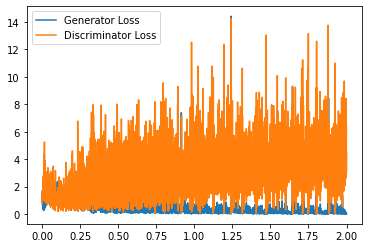

In [0]:
loss_history = OUT[1]

import numpy as np


# where does 3166 come from???
#epoch_by_batch = np.arange(0,num_epoch+1,10/(len(loss_history["G"])*num_epoch))
epoch_by_batch = np.linspace(0, num_epoch, num=(len(loss_history["G"])))

#epoch_by_batch = epoch_by_batch[0:-1]
plt.plot(epoch_by_batch,loss_history["G"], label='Generator Loss')
plt.plot(epoch_by_batch,loss_history["D"], label='Discriminator Loss')
plt.legend()

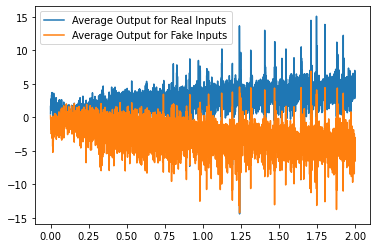

In [0]:
#epoch_by_batch = epoch_by_batch[0:-1]
plt.plot(epoch_by_batch,loss_history["ave_real"], label='Average Output for Real Inputs')
plt.plot(epoch_by_batch,loss_history["ave_fake"], label='Average Output for Fake Inputs')
plt.legend()

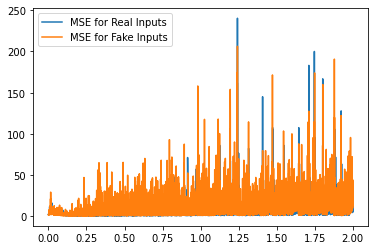

In [0]:
#epoch_by_batch = epoch_by_batch[0:-1]
plt.plot(epoch_by_batch,loss_history["mse_real"], label='MSE for Real Inputs')
plt.plot(epoch_by_batch,loss_history["mse_fake"], label='MSE for Fake Inputs')
plt.legend()

In [0]:
num_FID_MC = 256

from keras.applications.inception_v3 import InceptionV3
V3input_shape =(75, 75, 3)
modelv3 = InceptionV3(include_top=False, pooling='avg', input_shape=V3input_shape)
fid = Training.calc_FID_MC(generator,num_FID_MC,num_latent,modelv3)
print(fid)


4.231585752027971
